!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install matplotlib

In [3]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
%matplotlib inline

In [5]:
iris=datasets.load_iris()

In [6]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
x=iris['data']

In [9]:
y=iris['target']

In [10]:
x=pd.DataFrame(iris['data'],columns=iris['feature_names'])
y=pd.DataFrame(iris['target'],columns=['target'])

In [11]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [13]:
iris_data=pd.concat([x,y],axis=1)
iris_data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [ ]:
iris_data.corr()

<Axes: >

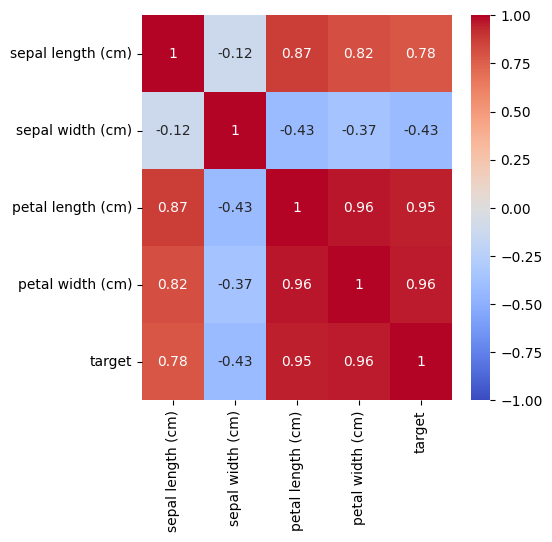

In [50]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(round(iris_data.corr(),3),annot=True,vmin=-1,vmax=1,cmap='coolwarm')

In [37]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test,=train_test_split(
    iris_data[['sepal length (cm)','petal length (cm)']],
    iris_data[['target']],test_size=0.2,random_state=0
)

In [55]:
len(x_train), len(x_test) 

(120, 30)

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)


In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier()
knn.fit(x_train_std,y_train['target'].values)

KNeighborsClassifier()

In [45]:
knn.predict(x_test_std)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [46]:
y_test['target'].values

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [25]:
target_name=iris['target_names']

In [47]:
x_new=[[5.1,1.4],[5.9,5.1]]

In [48]:
x_new_std=sc.transform(x_new)
result=knn.predict(x_new_std)
for ans in result:
    print(target_name[ans])



setosa
virginica


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
